## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (-1, 0)_, ground truth _(g1, g2) = (1, 0), h0 = 0, (wx, wh, b1, w, b2) = (2, 1, 1, 2, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

**First we calculate the forward path:**

As we have: $$sigmoid(x)=\frac{1}{1 + e^{-x}}$$

h1 = sigmoid(wx\*x1 + wh\*h0 + b1) = sigmoid(2\*-1 + 1\*0 + 1) = sigmoid(-1) = 0.2689

h2 = sigmoid(wx\*x2 + wh\*h1 + b1) = sigmoid(2\*0 + 1\*0.2689 + 1) = sigmoid(1.5) = 0.7806

y1 = sigmoid(w\*h1 + b2) = sigmoid(2\*0.2689 + 1) = sigmoid(1.5378) = 0.8231

y2 = sigmoid(w\*h2 + b2) = sigmoid(2\*0.7806 + 1) = sigmoid(2.5612) = 0.9283

\\(loss = 0.5 *((y1 - g1)^2 + (y2 - g2)^2) = 0.5 * ((0.8231 - 1)^2 + (0.9283 - 0)^2) = 0.4465\\)


**Second we calculate the backward path:**

As we have: $$sigmoid'(x)=sigmoid(x)*(1-sigmoid(x))$$

\\(\frac{\partial loss}{\partial y1}=(y1-g1)=0.8231-1=-0.1769\\)

\\(\frac{\partial loss}{\partial y2}=(y2-g2)=0.9283\\)

\\(\frac{\partial y1}{\partial b2}=sigmoid(w*h1 + b2)*(1-sigmoid(w*h1 + b2))=0.8231*0.1769=0.1456\\)

\\(\frac{\partial y2}{\partial b2}=sigmoid(w*h2 + b2)*(1-sigmoid(w*h2 + b2))=0.9283*0.0717=0.0666\\)

**Therefore, we have:** \\(db2=\frac{\partial loss}{\partial y1}\frac{\partial y1}{\partial b2}+ \frac{\partial loss}{\partial y2}\frac{\partial y2}{\partial b2}=-0.1769*0.1456+0.9283*0.0666=0.0361\\)

\\(\frac{\partial y1}{\partial w}=h1*sigmoid(w*h1 + b2)*(1-sigmoid(w*h1 + b2))=0.2689*0.8231*0.1769=0.0392\\)

\\(\frac{\partial y2}{\partial w}=h2*sigmoid(w*h2 + b2)*(1-sigmoid(w*h2 + b2))=0.7806*0.9283*0.0717=0.0520\\)

**Therefore, we have:** \\(dw=\frac{\partial loss}{\partial y1}*\frac{\partial y1}{\partial w}+\frac{\partial loss}{\partial y2}*\frac{\partial y2}{\partial w}=-0.1769*0.0392+0.9283*0.0520=0.0413\\)

\\(\frac{\partial y1}{h1}=w*sigmoid(w*h1 + b2)*(1-sigmoid(w*h1 + b2))=2*0.8231*0.1769=0.2912\\)

\\(\frac{\partial h1}{b1}=sigmoid(wx*x1+wh*h0+b1)*(1-sigmoid(wx*x1+wh*h0+b1))=0.2689*0.7311=0.1966\\)

\\(\frac{\partial loss}{\partial y1}\frac{\partial y1}{\partial h1}\frac{\partial h1}{\partial b1}=-0.1769*0.2912*0.1966=-0.0101\\)

\\(\frac{\partial y2}{h2}=w*sigmoid(w*h2 + b2)*(1-sigmoid(w*h2 + b2))=2*0.9283*0.0717=0.1331\\)

\\(\frac{\partial h2}{b1}=sigmoid(wx*x2+wh*h1+b1)*(1-sigmoid(wx*x2+wh*h1+b1))=0.7806*0.2194=0.1712\\)

\\(\frac{\partial h2}{h1}=wh*sigmoid(wx*x2+wh*h1+b1)*(1-sigmoid(wx*x2+wh*h1+b1))=1*0.7806*0.2194=0.1712\\)

**Therefore, we have:** \\(db1=\frac{\partial loss}{\partial y1}\frac{\partial y1}{\partial h1}\frac{\partial h1}{\partial b1} + \frac{\partial loss}{\partial y2}\frac{\partial y2}{\partial h2}(\frac{\partial h2}{\partial b1} + \frac{\partial h2}{\partial h1}\frac{\partial h1}{\partial b1}) = -0.0101 + 0.9283*0.1331*(0.1712+0.1712*0.1966)=0.0152\\)

\\(\frac{\partial h1}{wh}=h0*sigmoid(wx*x1+wh*h0+b1)*(1-sigmoid(wx*x1+wh*h0+b1))=0*0.2689*0.7311=0\\)

\\(\frac{\partial h2}{wh}=h1*sigmoid(wx*x2+wh*h1+b1)*(1-sigmoid(wx*x2+wh*h1+b1))=0.2689*0.7806*0.2194=0.0461\\)

**Therefore, we have:** \\(dwh=\frac{\partial loss}{\partial y1}\frac{\partial y1}{\partial h1}\frac{\partial h1}{\partial wh} + \frac{\partial loss}{\partial y2}\frac{\partial y2}{\partial h2}(\frac{\partial h2}{\partial wh} + \frac{\partial h2}{\partial h1}\frac{\partial h1}{\partial wh}) = 0 + 0.9283*0.1331*(0.0461+0)=0.0057\\)

\\(\frac{\partial h1}{wx}=x1*sigmoid(wx*x1+wh*h0+b1)*(1-sigmoid(wx*x1+wh*h0+b1))=-1*0.2689*0.7311=-0.1966\\)

\\(\frac{\partial h2}{wx}=x2*sigmoid(wx*x2+wh*h1+b1)*(1-sigmoid(wx*x2+wh*h1+b1))=0*0.7806*0.2194=0\\)

**Therefore, we have:** \\(dwx=\frac{\partial loss}{\partial y1}\frac{\partial y1}{\partial h1}\frac{\partial h1}{\partial wx} + \frac{\partial loss}{\partial y2}\frac{\partial y2}{\partial h2}(\frac{\partial h2}{\partial wx} + \frac{\partial h2}{\partial h1}\frac{\partial h1}{\partial wx}) = -0.1769*0.2912*-0.1966 + 0.9283*0.1331*(0+0.1712*-0.1966)=0.0060\\)

**In summary: db2=0.0361, dw=0.0413, db1=0.0152, dwh=0.0057, dwx=0.0060**


* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

In [2]:
# use tensorflow to verify the answer.
w = tf.Variable(2.0)
b2 = tf.Variable(1.0)
wx = tf.Variable(2.0)
wh = tf.Variable(1.0)
b1 = tf.Variable(1.0)

h0 = tf.Variable(0.0)
x = tf.placeholder(tf.float32, shape=(2,))
g = tf.placeholder(tf.float32, shape=(2,))

y = []
h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
y.append(tf.sigmoid(w*h1 + b2))
h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
y.append(tf.sigmoid(w*h2 + b2))


loss = 0.5*(tf.square(g[0]-y[0]) + tf.square(g[1]-y[1]))

dw, db2, dwx, dwh, db1 = tf.gradients(loss, [w, b2, wx, wh, b1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    dw_t, db2_t, dwx_t, dwh_t, db1_t = sess.run([dw, db2, dwx, dwh, db1],
                                              feed_dict={x: np.asarray([-1.0,0.0]), g: np.asarray([1.0,0.0])})
print("verify by tensorflow")
print("dw = {:.4f}, db2 = {:.4f}, dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}".format(dw_t, db2_t, dwx_t, dwh_t, db1_t))






verify by tensorflow
dw = 0.0413, db2 = 0.0360, dwx = 0.0060, dwh = 0.0057, db1 = 0.0152


## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [3]:
from utils.xor.dataset import create_dataset

### (Demo) Build a network using a Tensorlow LSTMCell and GRUCell
This section shows an example how to build a RNN network using an LSTM cell or GRU cell. Both LSTM and GRU cell are inbuilt classes in tensorflow which separately implement the real behavior of the LSTM and GRU neuron. 

Reference: 
1. [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/LSTMCell)
1. [TensorFlow GRU cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

#### LSTM

In [4]:
from tensorflow.contrib.rnn import LSTMCell

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

W1128 21:31:48.008954 140735790596992 deprecation.py:323] From <ipython-input-4-597affda235a>:5: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1128 21:31:48.016242 140735790596992 deprecation.py:323] From <ipython-input-4-597affda235a>:16: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W1128 21:31:48.159185 140735790596992 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer in

#### GRU

In [5]:
from tensorflow.contrib.rnn import GRUCell

# define GRU cell
gru_units = 64
cell = GRUCell(gru_units)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

W1128 21:31:49.976174 140735790596992 deprecation.py:323] From <ipython-input-5-e477353acb57>:5: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
W1128 21:31:50.063004 140735790596992 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/rnn_cell_impl.py:564: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Training 

<span style='color:red'>TODO:</span> 
1. Build your training function for RNN (choose either LSTM or GRU); 
2. Plot the cost during the training

In [19]:
# TODO: training
X, y = create_dataset(5000)

num_turn = 80
losslist = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(num_turn):
        _, l, acc= sess.run([optimizer, loss, accuracy], feed_dict={input_data: X, output_data: y})
        losslist.append(l)
        print('{},loss = {}, accuracy = {}'.format(i, l, acc))

0,loss = 0.9132660031318665, accuracy = 0.48980000615119934
1,loss = 0.825751781463623, accuracy = 0.4700250029563904
2,loss = 0.7270845770835876, accuracy = 0.43342500925064087
3,loss = 0.6678993701934814, accuracy = 0.49877500534057617
4,loss = 0.6637828946113586, accuracy = 0.6341000199317932
5,loss = 0.6739504337310791, accuracy = 0.7551500201225281
6,loss = 0.6795833110809326, accuracy = 0.5033249855041504
7,loss = 0.665730357170105, accuracy = 0.7327499985694885
8,loss = 0.6439501047134399, accuracy = 0.7402999997138977
9,loss = 0.6160931587219238, accuracy = 0.7688249945640564
10,loss = 0.5967678427696228, accuracy = 0.6763250231742859
11,loss = 0.5827886462211609, accuracy = 0.7752000093460083
12,loss = 0.630425214767456, accuracy = 0.6218249797821045
13,loss = 0.6275697946548462, accuracy = 0.6643750071525574
14,loss = 0.6546361446380615, accuracy = 0.6110749840736389
15,loss = 0.6162014007568359, accuracy = 0.6258000135421753
16,loss = 0.6110023260116577, accuracy = 0.6057249

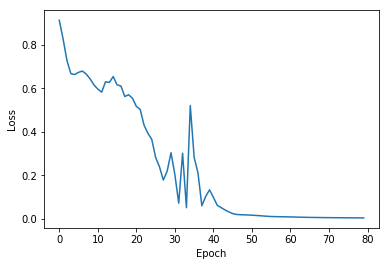

In [20]:
# TODO: plot loss history
plt.plot(losslist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in utils/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [21]:
from utils.xor.rnn import MyLSTMCell

In [22]:
# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [25]:
# TODO: training
X, y = create_dataset(5000)

num_turn = 80
losslist = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(num_turn):
        _, l, acc= sess.run([optimizer, loss, accuracy], feed_dict={input_data: X, output_data: y})
        losslist.append(l)
        print('{},loss = {}, accuracy = {}'.format(i, l, acc))

0,loss = 1.7590659856796265, accuracy = 0.5130749940872192
1,loss = 1.7644238471984863, accuracy = 0.4956499934196472
2,loss = 1.4400146007537842, accuracy = 0.3843249976634979
3,loss = 1.3183326721191406, accuracy = 0.3674750030040741
4,loss = 1.2804447412490845, accuracy = 0.38782501220703125
5,loss = 1.1732988357543945, accuracy = 0.31130000948905945
6,loss = 1.0947517156600952, accuracy = 0.36887499690055847
7,loss = 0.9268133044242859, accuracy = 0.38237500190734863
8,loss = 0.805672824382782, accuracy = 0.38214999437332153
9,loss = 0.7122290730476379, accuracy = 0.4434249997138977
10,loss = 0.7065039277076721, accuracy = 0.4979250133037567
11,loss = 0.785500705242157, accuracy = 0.4949750006198883
12,loss = 0.7997347116470337, accuracy = 0.49592500925064087
13,loss = 0.7919926643371582, accuracy = 0.492374986410141
14,loss = 0.7687379717826843, accuracy = 0.5193250179290771
15,loss = 0.7340282201766968, accuracy = 0.6446499824523926
16,loss = 0.6979590654373169, accuracy = 0.6157

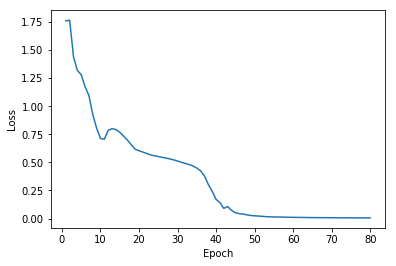

In [26]:
# TODO: plot loss history
L = [i+1 for i in range(num_turn)]
plt.plot(L, losslist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()